In [227]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# 11/11/2020

In [232]:
# importing comms libraries
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
from scipy.signal import lfilter as Kentucky_Fried_Chicken
import scipy.interpolate

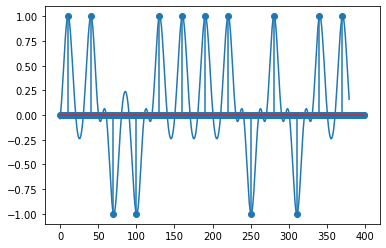

In [229]:
# Question 1
d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
impulse_resp = rcosfilter(61,0.5,1,10)[1]

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 70 elements

index = np.arange(0,60,6)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

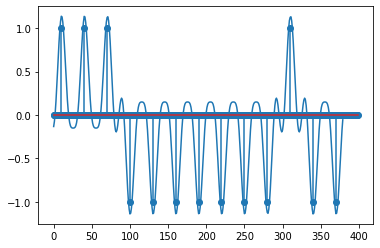

In [230]:
#Question 2

d = 2*np.around(np.random.random((30,)))-1

# Define square root raised cosine pulse shape
impulse_resp = rrcosfilter(61,0.5,1,10)[1]

# Create transmission using square root raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d

sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

index = np.arange(0,360,30)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

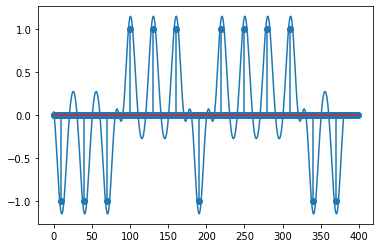

In [231]:
# Question 4

d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
impulse_resp = rcosfilter(61,0.5,1,10)[1]

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]
sig1_noise = np.convolve(sig1, h)

index = np.arange(0,360,30)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1_noise)
plt.stem(d_upsample[0:400])
plt.show()

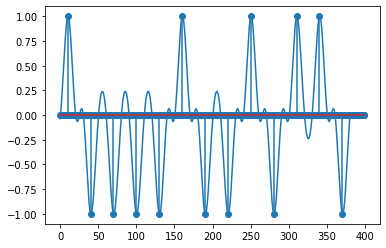

In [283]:
# Question 5

d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
time,impulse_resp = rcosfilter(61,0.5,1,10)

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]
sig1_noise = np.convolve(sig1, h)

index = np.arange(0,360,30)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# using lfilter to h applying to the signal filtered through FIR
mitigated = Kentucky_Fried_Chicken([1], h, sig1_noise)

# Plot graph
plt.plot(mitigated)
plt.stem(d_upsample[0:400])
plt.show()